# ***Download NLTK***

In [87]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

# ***Importing Libraries***

In [88]:
# Importing the NumPy library as 'np' for numerical computations and array manipulation
import numpy as np

# Importing the pandas library as 'pd' for data manipulation and analysis
import pandas as pd

# Importing the requests library for making HTTP requests
import requests

# Importing the BeautifulSoup class from the bs4 module for HTML parsing
from bs4 import BeautifulSoup

# Importing the 're' module for regular expression operations
import re

# Importing the nltk library for natural language processing tasks
import nltk

# Importing the string module for string manipulation operations
import string

# Importing the WordNetLemmatizer class from the nltk.stem module for lemmatization
from nltk.stem import WordNetLemmatizer

# Importing the stopwords corpus from the nltk.corpus module for removing common words
from nltk.corpus import stopwords

# Importing the itertools module for efficient looping and combination generation
import itertools

# Importing the CountVectorizer and TfidfVectorizer classes from the sklearn.feature_extraction.text module for text vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Importing the sent_tokenize and word_tokenize functions from the nltk.tokenize module for text tokenization
from nltk.tokenize import sent_tokenize, word_tokenize
# Importing the FreqDist class from the nltk.probability module for frequency distribution analysis
from nltk.probability import FreqDist

# Importing the TextBlob class from the textblob module for sentiment analysis and text processing
from textblob import TextBlob

# Importing the SentimentIntensityAnalyzer class from the nltk.sentiment.vader module for sentiment analysis using the VADER lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer

  # Importing the pyplot module from the matplotlib library for data visualization
import matplotlib.pyplot as plt

# Importing the seaborn library for enhanced data visualization capabilities
import seaborn as sns

# Setting the seaborn plot style to 'whitegrid' for better visual appearance
sns.set_style('whitegrid')

# Importing the spacy library for advanced natural language processing tasks
import spacy

# Importing the displacy module from the spacy library for entity visualization
from spacy import displacy

# Loading the English language model from spacy
nlp = spacy.load("en_core_web_sm")


# ***Data Preprocessing Function***

In [89]:
def pre_processing(data_text):
    documents = []  # List to store preprocessed documents
    stemmer = WordNetLemmatizer()  # Initialize WordNetLemmatizer for word lemmatization

    # Iterate through each sentence in the data_text
    for sen in range(0, len(data_text)):
        document = re.sub(r'\W', ' ', str(data_text[sen]))  # Remove non-alphanumeric characters
        document = re.sub(re.escape(string.punctuation), '', document)  # Remove punctuation
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)  # Remove single-character words
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)  # Remove single-character words at the beginning of the document
        document = re.sub(r'\s+', ' ', document, flags=re.I)  # Replace multiple spaces with single space
        document = re.sub(r'^b\s+', '', document)  # Remove 'b' at the beginning of the document
        document = re.sub(r'^\s', '', document)  # Remove spaces at the beginning of the document
        document = re.sub(r'\s$', '', document)  # Remove spaces at the end of the document
        document = document.lower()  # Convert the document to lowercase

        document = document.split()  # Split the document into individual words
        document = [stemmer.lemmatize(word) for word in document]  # Lemmatize each word
        document = ' '.join(document)  # Join the lemmatized words back into a string

        document = [word for word in document.split() if word not in stopwords.words("english")]  # Remove stopwords
        document = ' '.join(document)  # Join the remaining words back into a string

        # Skip empty documents or documents containing only whitespace
        if re.search(r'^\s*$', document) is not None:
            continue
        if not document:
            continue

        documents.append(document)  # Add the preprocessed document to the list of documents

    return documents


# ***Data Scraping Function***

In [90]:
def url_script(url):
    # Headder information
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.70 Safari/537.36'}

    # Send a GET request to the specified URL with headers
    page = requests.get(url, headers=headers).text

    # Create a BeautifulSoup object from the page content using the HTML parser
    soup = BeautifulSoup(page, 'html.parser')

    # Extract the text content from all <p> elements in the parsed HTML
    text = [p.text for p in soup.find_all('p')]

    print(url)  # Print the URL for debugging or tracking purposes

    return text  # Return the extracted text content


# ***List of URLs to Scrape***

In [91]:
urls=['https://www.investopedia.com/terms/d/data-analytics.asp',
      'https://www.mastersindatascience.org/learning/what-is-data-analytics/',
      'https://searchdatamanagement.techtarget.com/definition/data-analytics',
      'https://www.lotame.com/what-is-data-analytics/',
      'https://www.thinkful.com/blog/data-analytics-blogs/',
      'https://www.tibco.com/reference-center/what-is-data-analytics',
      'https://www.simplilearn.com/data-science-vs-big-data-vs-data-analytics-article',
      'https://www.ibm.com/analytics/hadoop/big-data-analytics',
      'https://www.teradata.com/Blogs/5-Big-Benefits-of-Data-and-Analytics-for-Positive-Business-Outcomes',
      'https://www.bmc.com/blogs/data-analytics-vs-data-analysis/',
      'https://www.accaglobal.com/in/en/student/exam-support-resources/professional-exams-study-resources/p7/technical-articles/data-analytics.html',
      'https://www.stitchdata.com/resources/benefits-of-data-analytics/',
      'https://www.qubole.com/big-data-analytics/',
      'https://www.dickinson.edu/homepage/1474/data_analytics',
      'https://www.dmu.ac.uk/study/courses/postgraduate-courses/data-analytics-msc-degree/data-analytics-msc-degrees.aspx',
      'https://www.statistics.com/data-analytics/',
      'https://www.scnsoft.com/blog/4-types-of-data-analytics',
      'https://www.dataversity.net/brief-history-analytics/',
      'https://www.sabanciuniv.edu/en/data-analytics',
      'https://www.northeastern.edu/graduate/blog/data-analytics-vs-data-science/',
      'https://www.mckinsey.com/business-functions/mckinsey-digital/our-insights/making-data-analytics-work-for-you-instead-of-the-other-way-around',
      'https://www.eweek.com/big-data-and-analytics/data-analytics-trends/',
      'https://corporatefinanceinstitute.com/resources/knowledge/other/data-analytics/',
      'https://chartio.com/learn/data-analytics/types-of-data-analysis/',
      'https://www.intel.com/content/www/us/en/analytics/what-is-data-analytics.html',
      'https://www.omnisci.com/learn/big-data-analytics',
      'https://www.lighthouselabs.ca/en/blog/the-five-stages-of-data-analysis',
      'https://www.bdo.com.au/en-au/services/advisory/consulting/data-analytics/what-is-data-analytics',
      'https://www.journalofaccountancy.com/issues/2016/aug/data-analytics-skills.html',
      'https://www.retail-insight-network.com/dashboards/data-analytics-hiring-levels-in-the-retail-industry-rose-in-october-2021/',
      'https://www.ironhack.com/en/data-analytics/data-science-data-analytics',
      'https://www.comptia.org/blog/best-data-analytics-certifications',
      'https://www.kenan-flagler.unc.edu/perspectives/why-data-analytics-matter-to-accountants/',
      'https://www.apm.org.uk/resources/what-is-project-management/what-is-project-data-analytics/',
      'https://www.techopedia.com/definition/26418/data-analytics',
      'https://www.clearrisk.com/risk-management-blog/challenges-of-data-analytics-0',
      'https://iterationinsights.com/article/where-to-start-with-the-4-types-of-analytics/',
      'https://www.packaging-gateway.com/uncategorised/data-analytics-hiring-levels-in-the-packaging-industry-rose-in-october-2021/',
      'https://www.naval-technology.com/analysis/data-analytics-hiring-levels-in-the-naval-industry-rose-in-october-2021/',
      'https://www.getsmarter.com/blog/career-advice/difference-data-analytics-data-analysis/',
     ]
raw_data=[]
cleaned_data=[]

# ***Loop to Scrap and Clean the Data***

In [92]:
x = 1  # Initialize a counter variable

# Iterate over the list of URLs
for i in urls:
    print(x)  # Print the current counter value
    text = url_script(i)  # Call the url_script function to retrieve the text content from the URL

    # Create a list with the text content joined as a single string
    raw_text = [' '.join(text)]

    # Extend the raw_data list with the raw_text list
    raw_data.extend(raw_text)

    # Create a list with the preprocessed text content joined as a single string
    clean_text = [' '.join(pre_processing(text))]

    # Extend the cleaned_data list with the clean_text list
    cleaned_data.extend(clean_text)

    x += 1  # Increment the counter by 1

print(raw_data)  # Print the raw data list


1
https://www.investopedia.com/terms/d/data-analytics.asp
2
https://www.mastersindatascience.org/learning/what-is-data-analytics/
3
https://searchdatamanagement.techtarget.com/definition/data-analytics
4
https://www.lotame.com/what-is-data-analytics/
5
https://www.thinkful.com/blog/data-analytics-blogs/
6
https://www.tibco.com/reference-center/what-is-data-analytics
7
https://www.simplilearn.com/data-science-vs-big-data-vs-data-analytics-article
8
https://www.ibm.com/analytics/hadoop/big-data-analytics
9
https://www.teradata.com/Blogs/5-Big-Benefits-of-Data-and-Analytics-for-Positive-Business-Outcomes
10
https://www.bmc.com/blogs/data-analytics-vs-data-analysis/
11
https://www.accaglobal.com/in/en/student/exam-support-resources/professional-exams-study-resources/p7/technical-articles/data-analytics.html
12
https://www.stitchdata.com/resources/benefits-of-data-analytics/
13
https://www.qubole.com/big-data-analytics/
14
https://www.dickinson.edu/homepage/1474/data_analytics
15
https://ww

# ***Comparing Length of Raw and Cleaned Data***

In [93]:
print(len(raw_data))
print(len(cleaned_data))

40
40


# ***Creating Dataframe of Raw and Cleaned Data***

In [94]:
df1 = pd.DataFrame()  # Create an empty DataFrame

df1['Raw Data'] = raw_data  # Create a new column named 'Raw Data' in df1 and assign raw_data to it
df1['Cleaned Data'] = cleaned_data  # Create a new column named 'Cleaned Data' in df1 and assign cleaned_data to it


# ***Saving the DataFrame into a CSV File***

In [95]:
# Importing the necessary module from the google.colab library
from google.colab import files

# Saving the DataFrame df1 to a CSV file named "clean_data.csv" without including the index column
df1.to_csv("clean_data.csv", index=False)

# Downloading the "clean_data.csv" file from the Colab environment
files.download('clean_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ***Sentiment Analysis***

In [96]:
# Calculating the sentiment of the first element in the "Cleaned Data" column of the DataFrame df1 using TextBlob
TextBlob(df1["Cleaned Data"].iloc[0]).sentiment

Sentiment(polarity=0.10568786192162816, subjectivity=0.44297195589403365)

In [97]:
# Importing the necessary module from the sklearn.feature_extraction.text library
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating an instance of the TfidfVectorizer class with specified parameters
tfidfconverter = TfidfVectorizer(
    max_features=1500,    # Maximum number of features to consider
    min_df=5,             # Ignore terms that appear in less than 5 documents
    max_df=0.7,           # Ignore terms that appear in more than 70% of the documents
    ngram_range=(1, 3),   # Consider unigrams, bigrams, and trigrams
    stop_words=stopwords.words('english')   # Remove common English stopwords
)

# Transforming the "Cleaned Data" column of the DataFrame df1 into a TF-IDF matrix representation
x = tfidfconverter.fit_transform(df1["Cleaned Data"]).toarray()

# Printing the TF-IDF matrix
print(x)

[[0.04063419 0.         0.         ... 0.02676782 0.0428974  0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.16642563 0.         0.        ]
 [0.         0.         0.         ... 0.16844141 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [98]:
# Retrieving the feature names from the TfidfVectorizer
tfidfconverter.get_feature_names_out()

array(['000', '10', '100', ..., 'year', 'year experience', 'yet'],
      dtype=object)

In [99]:
# Calculating the length of the feature names extracted from the TfidfVectorizer
len(tfidfconverter.get_feature_names_out())

1008

# ***Finding Frequency Distribution of Dataset***

In [100]:
# Accessing the "Cleaned Data" column of DataFrame df1
df1['Cleaned Data'][:]

0     pete rathburn copy editor fact checker experti...
1     updated privacy policy better reflect collect ...
2     data analytics da process examining data set f...
3     data help business better understand customer ...
4     data analytics data analyst lead charge collec...
5     data analytics enables organization analyze da...
6     data everywhere part daily life way u realize ...
7     big data analytics use advanced analytic techn...
8     today business collect data along every point ...
9     view result data analysis data analytics two t...
10    global body professional accountant find locat...
11    rich variety data enterprise generate contains...
12    start free trial discover query visualize data...
13    data analytics data heart many today daunting ...
14    developed collaboration sa world leader field ...
15    explore course elder research contact lm login...
16                                                     
17    historically speaking simple definition an

In [101]:
# Creating an instance of FreqDist class
fdist = FreqDist()

# Iterating through each word in the "Cleaned Data" column of DataFrame df1
for x in str(df1['Cleaned Data'][:]).split():
    # Incrementing the count of each word in the FreqDist object
    fdist[x] += 1

# Calculating the length of the FreqDist object, which represents the number of unique words
len(fdist)

247

In [102]:
fdist.most_common(10)

[('data', 24),
 ('analytics', 11),
 ('...', 9),
 ('big', 3),
 ('view', 3),
 ('site', 3),
 ('program', 3),
 ('1', 2),
 ('better', 2),
 ('collect', 2)]

In [103]:
# Adding a new column "Polarity" to DataFrame df1, calculated using TextBlob sentiment analysis
df1['Polarity'] = df1["Cleaned Data"].apply(lambda x: TextBlob(x).sentiment[0])

# Adding a new column "Subjectivity" to DataFrame df1, calculated using TextBlob sentiment analysis
df1['Subjectivity'] = df1["Cleaned Data"].apply(lambda x: TextBlob(x).sentiment[1])

# Adding a new column "Length" to DataFrame df1, representing the word count of each text in the "Cleaned Data" column
df1['Length'] = df1["Cleaned Data"].apply(lambda x: len(x.split()))

# Displaying the first few rows of the modified DataFrame df1
df1.head()

,Raw Data,Cleaned Data,Polarity,Subjectivity,Length
0,Pete Rathburn is a copy editor and fact-checke...,pete rathburn copy editor fact checker experti...,0.105688,0.442972,620
1,We have updated our Privacy Policy to better r...,updated privacy policy better reflect collect ...,0.139369,0.489934,772
2,Data analytics (DA) is the process of examinin...,data analytics da process examining data set f...,0.052708,0.361244,1000
3,Data can help businesses better understand the...,data help business better understand customer ...,0.151186,0.458372,1023
4,Data Analytics Data analysts lead the charge i...,data analytics data analyst lead charge collec...,0.176233,0.386873,946


# ***Extract features based on sentiments (positive, negative, neutral, and compound), polarity subjectivity and length***

In [104]:
# Calculating Polarity and Subjectivity using TextBlob sentiment analysis
df1[['Polarity', 'Subjectivity']] = df1['Cleaned Data'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

# Iterating through each text in the "Cleaned Data" column
for index, row in df1['Cleaned Data'].iteritems():
    # Calculating sentiment scores using SentimentIntensityAnalyzer
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']

    # Assigning class labels based on sentiment scores
    if neg > pos:
        df1.loc[index, 'Class_Label'] = "negative"
    elif pos > neg:
        df1.loc[index, 'Class_Label'] = "positive"
    else:
        df1.loc[index, 'Class_Label'] = "neutral"

    # Assigning sentiment scores to respective columns
    df1.loc[index, 'neg'] = neg
    df1.loc[index, 'neu'] = neu
    df1.loc[index, 'pos'] = pos
    df1.loc[index, 'compound'] = comp

# Displaying the first few rows of the modified DataFrame df1
df1.head()

<ipython-input-104-7a5b7b7759fb>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in df1['Cleaned Data'].iteritems():


,Raw Data,Cleaned Data,Polarity,Subjectivity,Length,Class_Label,neg,neu,pos,compound
0,Pete Rathburn is a copy editor and fact-checke...,pete rathburn copy editor fact checker experti...,0.105688,0.442972,620,positive,0.030,0.776,0.194,0.9986
1,We have updated our Privacy Policy to better r...,updated privacy policy better reflect collect ...,0.139369,0.489934,772,positive,0.028,0.773,0.199,0.9992
2,Data analytics (DA) is the process of examinin...,data analytics da process examining data set f...,0.052708,0.361244,1000,positive,0.018,0.876,0.107,0.9973
3,Data can help businesses better understand the...,data help business better understand customer ...,0.151186,0.458372,1023,positive,0.015,0.736,0.249,0.9998
4,Data Analytics Data analysts lead the charge i...,data analytics data analyst lead charge collec...,0.176233,0.386873,946,positive,0.018,0.732,0.250,0.9997


In [105]:
# Creating an instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Applying sentiment analysis and assigning sentiment scores to respective columns
df1[['neg', 'neu', 'pos', 'compound']] = df1['Cleaned Data'].apply(sid.polarity_scores).apply(pd.Series)

# Displaying the first few rows of the modified DataFrame df1
df1.head()

,Raw Data,Cleaned Data,Polarity,Subjectivity,Length,Class_Label,neg,neu,pos,compound
0,Pete Rathburn is a copy editor and fact-checke...,pete rathburn copy editor fact checker experti...,0.105688,0.442972,620,positive,0.030,0.776,0.194,0.9986
1,We have updated our Privacy Policy to better r...,updated privacy policy better reflect collect ...,0.139369,0.489934,772,positive,0.028,0.773,0.199,0.9992
2,Data analytics (DA) is the process of examinin...,data analytics da process examining data set f...,0.052708,0.361244,1000,positive,0.018,0.876,0.107,0.9973
3,Data can help businesses better understand the...,data help business better understand customer ...,0.151186,0.458372,1023,positive,0.015,0.736,0.249,0.9998
4,Data Analytics Data analysts lead the charge i...,data analytics data analyst lead charge collec...,0.176233,0.386873,946,positive,0.018,0.732,0.250,0.9997


# ***Visualization of DataSet***

<Axes: xlabel='Length', ylabel='Subjectivity'>

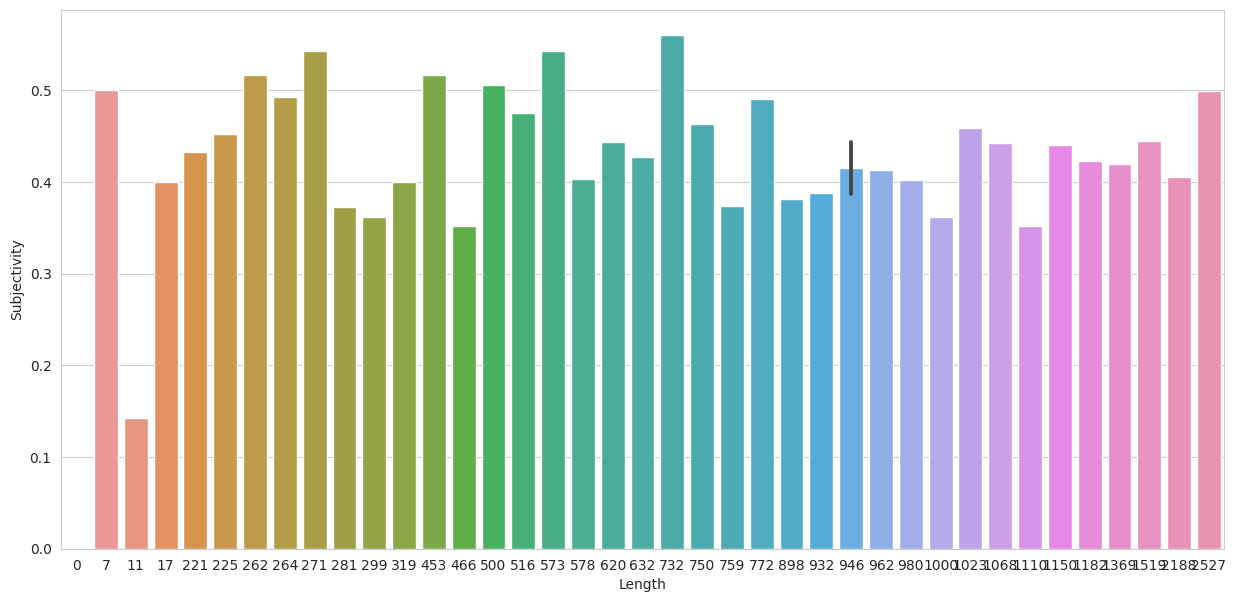

In [106]:
# Setting the figure size for the plot
plt.figure(figsize=(15, 7))

# Creating a bar plot using seaborn
sns.barplot(data=df1, x="Length", y="Subjectivity")

<Axes: xlabel='Length', ylabel='Polarity'>

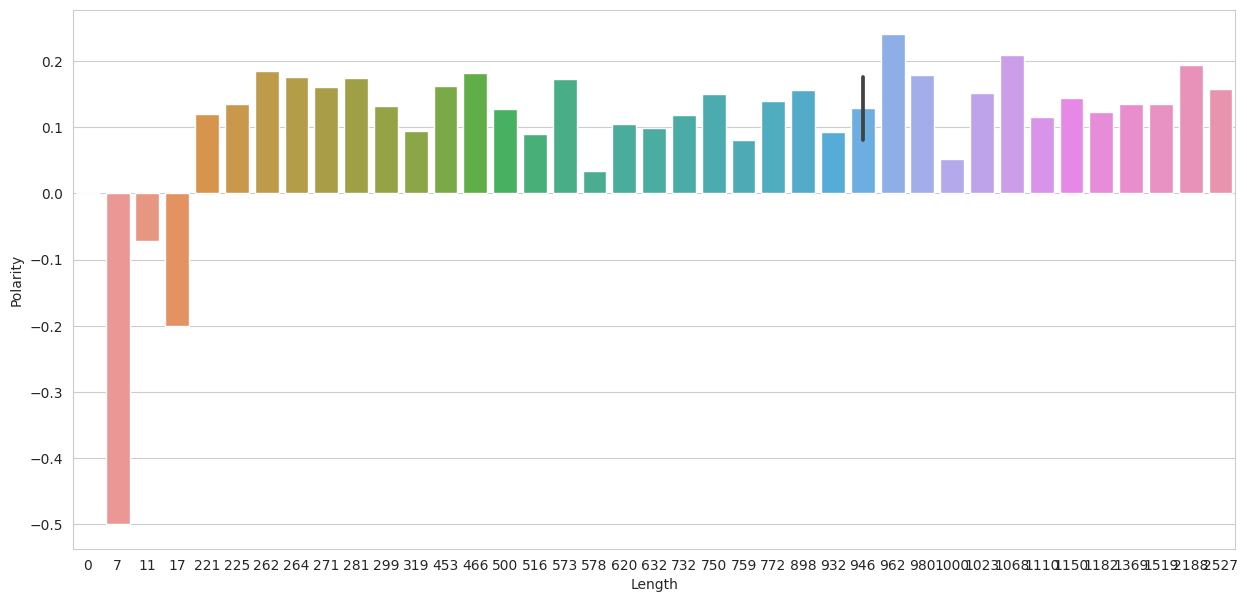

In [107]:
# Setting the figure size for the plot
plt.figure(figsize=(15, 7))

# Creating a bar plot using seaborn
sns.barplot(data=df1, x="Length", y="Polarity")

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 [Text(0.0, 0, '0.00'),
  Text(0.05, 0, '0.05'),
  Text(0.1, 0, '0.10'),
  Text(0.15000000000000002, 0, '0.15'),
  Text(0.2, 0, '0.20'),
  Text(0.25, 0, '0.25'),
  Text(0.30000000000000004, 0, '0.30')])

<Figure size 1500x700 with 0 Axes>

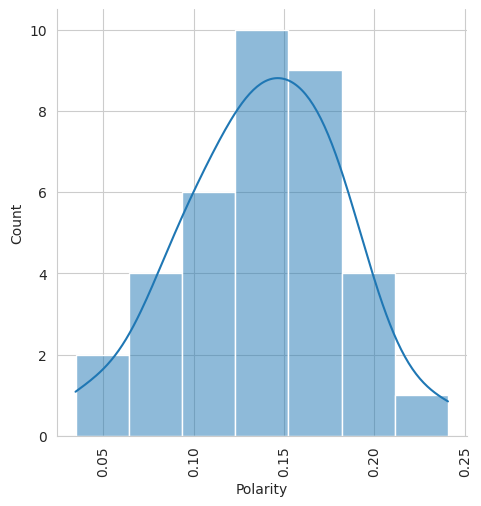

In [108]:
# Setting the figure size for the plot
plt.figure(figsize=(15, 7))

# Creating a distribution plot using seaborn
sns.displot(df1[df1['Polarity'] > 0]['Polarity'][:50], kde=True)

# Rotating the x-axis tick labels for better readability
plt.xticks(rotation=90)

<Figure size 1500x700 with 0 Axes>

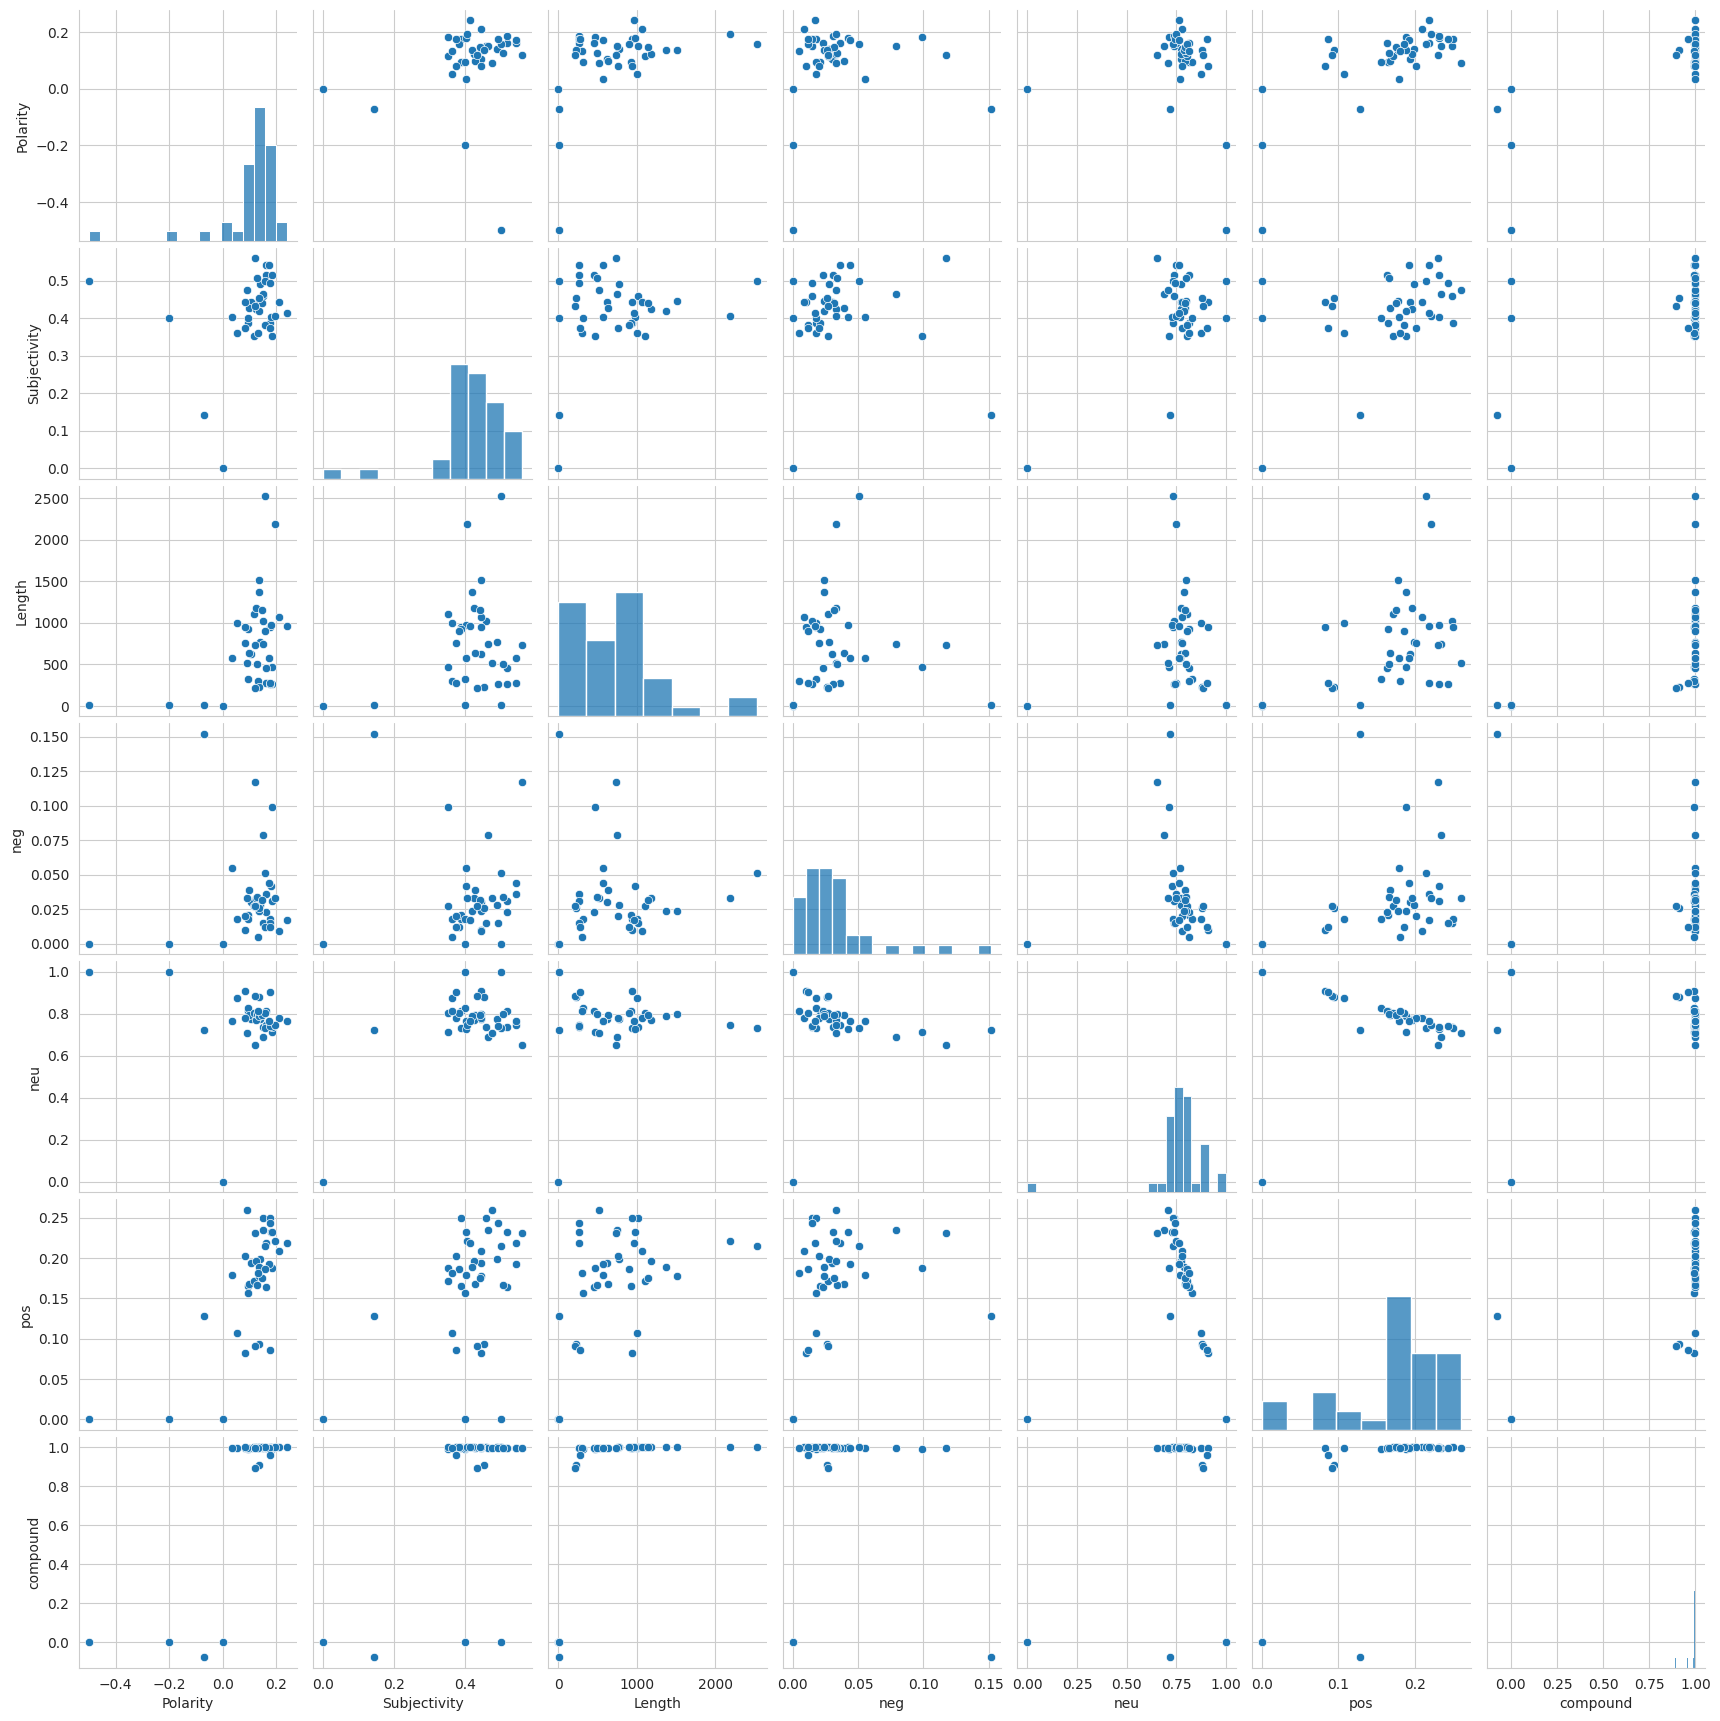

In [109]:
# Setting the figure size for the plot
plt.figure(figsize=(15, 7))

# Creating a pair plot using seaborn
sns.pairplot(df1)

<Axes: ylabel='Frequency'>

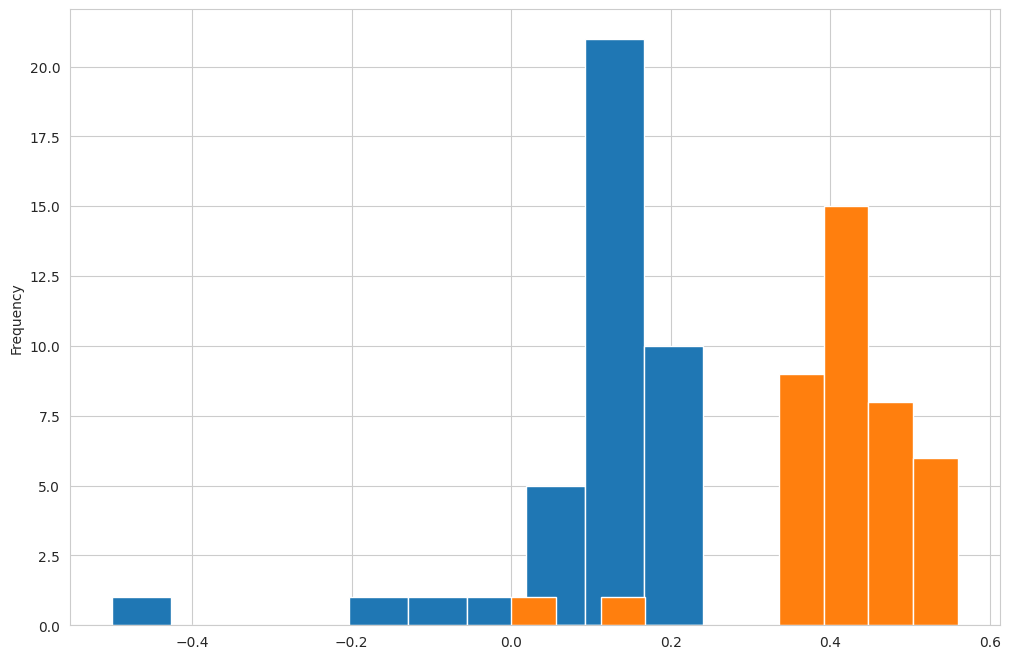

In [110]:
# Setting the figure size for the plot
plt.figure(figsize=(12, 8))

# Plotting the histogram for 'Polarity' column
df1['Polarity'].plot(kind='hist')

# Plotting the histogram for 'Subjectivity' column
df1['Subjectivity'].plot(kind='hist')

<Axes: >

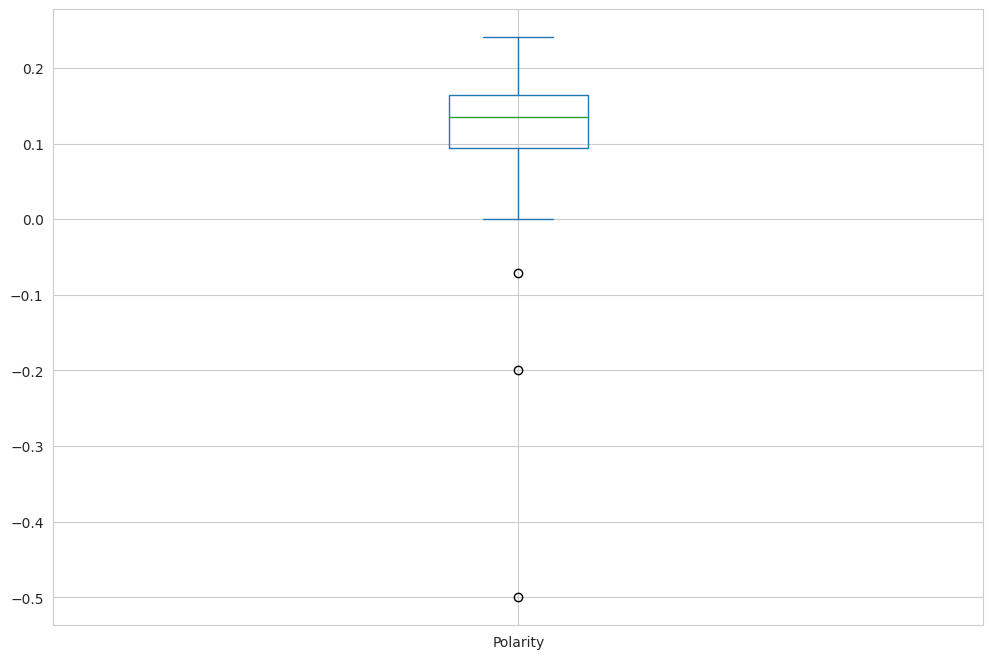

In [111]:
# Setting the figure size for the plot
plt.figure(figsize=(12, 8))

# Creating a box plot for the 'Polarity' column
df1['Polarity'].plot(kind='box')

<Axes: >

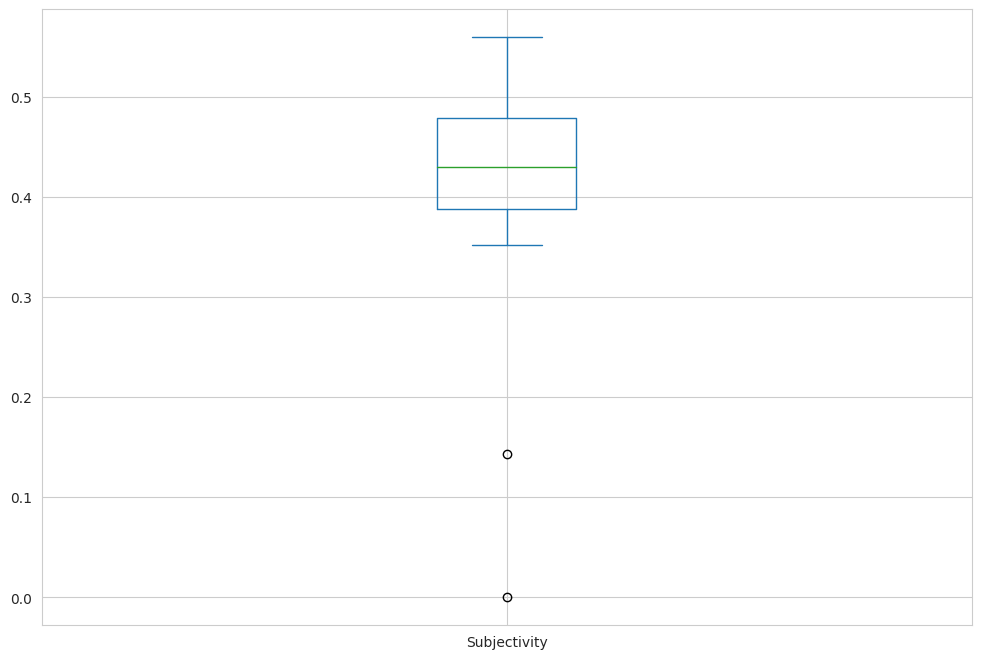

In [112]:
# Setting the figure size for the plot
plt.figure(figsize=(12, 8))

# Creating a box plot for the 'Subjectivity' column
df1['Subjectivity'].plot(kind='box')

In [113]:
# Creating a Doc object using the text from the first row of the "Cleaned Data" column
doc = nlp(df1["Cleaned Data"].iloc[0])

# Rendering the dependency parse tree using displacy
displacy.render(doc)

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="36105a7fc7cf4fac888d3d3f7e37d64f-0" class="displacy" width="108550" height="2324.5" direction="ltr" style="max-width: none; height: 2324.5px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="2234.5">\n    <tspan class="displacy-word" fill="currentColor" x="50">pete</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">ADJ</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="2234.5">\n    <tspan class="displacy-word" fill="currentColor" x="225">rathburn</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">NOUN</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="2234.5">\n    <tspan class="displacy-word" fill="currentColor" x="400">copy</tspan>\n    <tspan class="

# ***WordCloud***

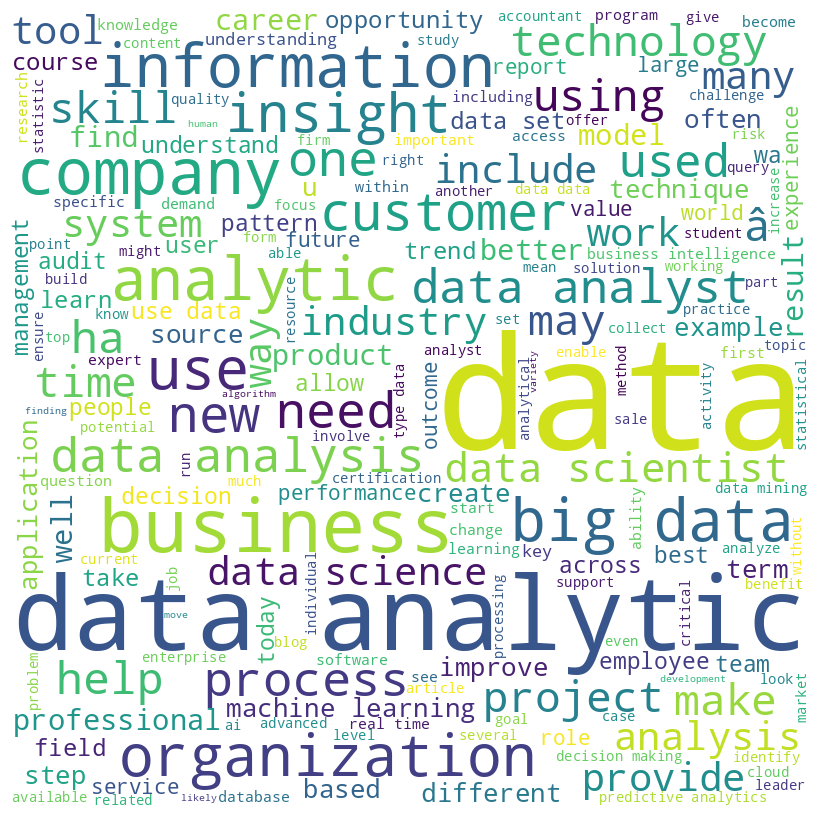

In [114]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Initializing an empty string to store the words
comment_words = ''

# Defining the stopwords
stopwords = set(STOPWORDS)

# Iterating through each value in the "Cleaned Data" column
for val in df1["Cleaned Data"]:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens) + " "

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(comment_words)

# Setting up the plot figure
plt.figure(figsize=(8, 8), facecolor=None)

# Displaying the WordCloud
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Showing the plot
plt.show()


# ***Classification***

In [115]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [116]:
# Creating a Random Forest Classifier
clf = RandomForestClassifier()

# Extracting the feature matrix X and target variable y from df1
x=df1[["Length","Polarity","Subjectivity","neg","neu","pos","compound"]].values
y=df1["Class_Label"].values

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape, y_train.shape

((28, 7), (28,))

In [118]:
x_test.shape, y_test.shape

((12, 7), (12,))

In [119]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [120]:
print(clf.predict(x_test))

['positive' 'positive' 'positive' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'neutral' 'positive']


In [121]:
clf.fit(x_train, y_train).score(x_test, y_test)

1.0

In [122]:
from pandas.plotting import scatter_matrix
import sklearn
from sklearn import tree
from sklearn import datasets, model_selection
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [123]:
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x, y, test_size=0.2, random_state=7)

In [124]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('SVM', SVC()))

In [ ]:
results=[]
names=[]

In [125]:
for name, model in models:
    kfold=model_selection .KFold(n_splits=10)
    cv_results=model_selection .cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR : 0.941667 (0.118145)
KNN : 0.950000 (0.150000)
DT : 0.908333 (0.141667)
SVM : 0.891667 (0.175000)


In [126]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=0)

In [127]:
dt_cl=tree.DecisionTreeClassifier(max_depth=5)
dt_cl.fit(x_train, y_train)
dt_cl.score(x_test, y_test)

0.9166666666666666

In [128]:
y_prd=dt_cl.predict(x_test)
dt_cl.score(x_test, y_test)

0.9166666666666666

In [129]:
y_prd=dt_cl.predict(x_test)
confusion_matrix(y_test, y_prd)

array([[ 0,  1,  0],
       [ 0,  1,  0],
       [ 0,  0, 10]])

In [130]:
rf_cl=ensemble.RandomForestClassifier(n_estimators=100)
rf_cl.fit(x_train, y_train)
rf_cl.score(x_test, y_test)

0.9166666666666666